In [2]:
import numpy as np
import pandas as pd
import re

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from nltk.corpus import wordnet

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
# グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

In [4]:
data_vad = pd.read_table('./Emobank-master/corpus/reader.tsv')

In [5]:
# 加工前データ,加工後データ の valence,arousal の分布を表示する

In [6]:
data_arousal = pd.read_csv('data_preprocessed_Arousal.csv',encoding='utf-16')
data_valence = pd.read_csv('data_preprocessed_Valence.csv',encoding='utf-16')

In [7]:
% matplotlib inline

In [8]:
data_vad.head()

,id,Arousal,Dominance,Valence,sd.Arousal,sd.Dominance,sd.Valence,freq
0,110CYL068_1036_1079,3.200000,3.000000,3.0,0.400000,0.000000,0.000000,5
1,110CYL068_1079_1110,3.000000,2.600000,2.6,0.632456,0.489898,0.489898,5
2,110CYL068_1110_1127,2.333333,2.333333,2.0,0.471405,0.471405,1.414214,3
3,110CYL068_1127_1130,3.000000,3.000000,3.0,0.000000,0.000000,0.000000,2
4,110CYL068_1137_1188,3.000000,3.400000,3.6,0.632456,0.489898,0.800000,5


In [8]:
a = 1
b = 5
data_vad = data_vad.assign(
    Valence_reg = data_vad.apply(lambda x: 2*(x['Valence']-a)/(b-a)-1, axis=1),
    Arousal_reg = data_vad.apply(lambda x: 2*(x['Arousal']-a)/(b-a)-1, axis=1),
    Dominance_reg = data_vad.apply(lambda x: 2*(x['Dominance']-a)/(b-a)-1, axis=1)
)


In [9]:
%%bash
pip install seaborn

mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
import seaborn as sns

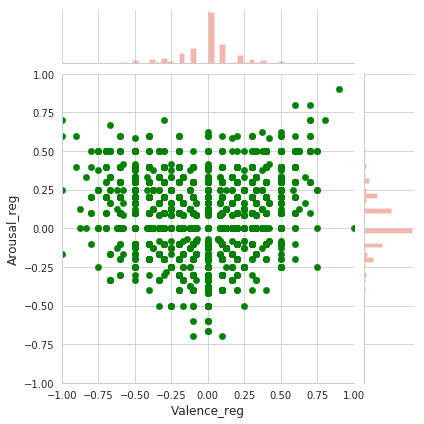

In [54]:
g = sns.JointGrid(x='Valence_reg',y='Arousal_reg',data=data_vad,xlim=(-1,1),ylim=(-1,1)) 
g = g.plot_joint(plt.scatter,color='green',s=40)
g = g.plot_marginals(sns.distplot,kde=False)

In [55]:
g.savefig('./plot_images/raw_plot.png')

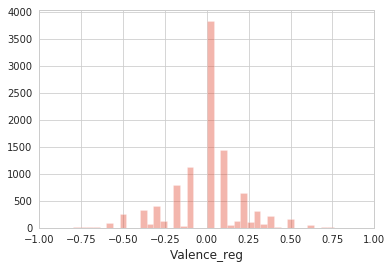

In [62]:
sns.set_style("whitegrid")
g_1 = sns.distplot(data_vad.Valence_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/raw_dist_v.png')

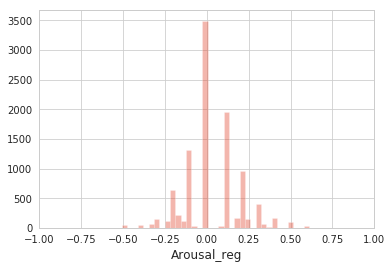

In [63]:
sns.set_style("whitegrid")
g_1 = sns.distplot(data_vad.Arousal_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/raw_dist_a.png')

In [64]:
data_valence.head()

,Unnamed: 0,id,sentence,Arousal,Dominance,Valence,sd.Arousal,sd.Dominance,sd.Valence,freq,reg,words,data_type,Valence_reg,Arousal_reg,Dominance_reg
0,2568,cable_spool_fort_5107_5146,Several more boys spewed out after him.,3.2,2.6,2.6,0.748331,0.489898,0.489898,5,several more boys spewed out after him,7,train,-0.2,0.1,-0.2
1,2548,cable_spool_fort_3784_3808,Chad just hung his head.,3.2,2.6,2.4,0.400000,0.800000,0.800000,5,chad just hung his head,5,train,-0.3,0.1,-0.2
2,3883,hotel-california_28834_28854,"“I don't know much,”",2.6,2.6,2.6,0.489898,0.489898,0.489898,5,i don t know much,5,train,-0.2,-0.2,-0.2
3,370,detroit_10463_10549,They lack the means to build her back to her f...,3.4,3.0,2.6,0.489898,0.000000,0.489898,5,they lack the means to build her back to her f...,18,train,-0.2,0.2,0.0
4,9790,SemEval_1143,Steelers' Roethlisberger has concussion,2.4,2.4,1.8,0.800000,0.800000,0.748331,5,steelers roethlisberger has concussion,4,train,-0.6,-0.3,-0.3


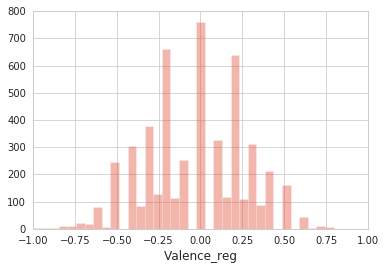

In [90]:
sns.set_style("whitegrid")
g_1 = sns.distplot(data_valence.Valence_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/processed_dist_v.png')

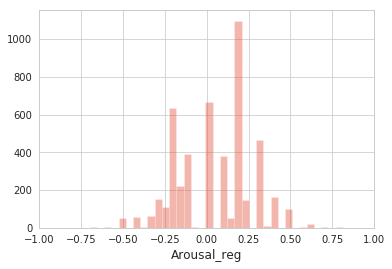

In [67]:
g_1 = sns.distplot(data_arousal.Arousal_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/processed_dist_a.png')

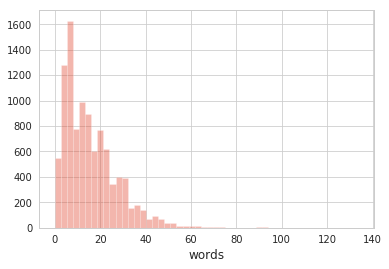

In [83]:
# wordをplotする
data_preprocessed = pd.read_csv('data_preprocessed_2.csv',encoding='utf-16')
g_words = sns.distplot(data_preprocessed.words,kde=False)
plt.savefig('./plot_images/words_dist')

In [84]:
data_preprocessed[data_preprocessed['words']==20]['sentence'].head()

14    Just saying....it seems I have more life now t...
60    I like to read about others watching baseball ...
67    This website and everything on it is in the Pu...
72    Now, many more moderate Muslims have become ra...
75    The terrorists could strike any time they choo...
Name: sentence, dtype: object

In [85]:
data_preprocessed[data_preprocessed['words']==15].head()

,Unnamed: 0,id,sentence,Arousal,Dominance,Valence,sd.Arousal,sd.Dominance,sd.Valence,freq,reg,words
49,49,Acephalous-Internet_2652_2750,"Apparently the drug use, sexual excess, and we...",3.2,3.2,2.8,0.400000,0.400000,0.400000,5,apparently the drug use sexual excess and we...,15
82,82,Anti-Terrorist_1812_1901,So the Bush administration can keep claiming t...,3.0,3.0,3.0,0.000000,0.000000,0.000000,5,so the bush administration can keep claiming t...,15
113,113,Anti-Terrorist_5071_5156,"To deny reality, as the Israeli/NeoCons do, is...",2.6,3.4,2.6,0.489898,0.489898,0.489898,5,to deny reality as the israeli/neocons do is...,15
134,134,blog-monastery_1326_1390,"He began by telling us, ""Do not take any of wh...",3.2,2.8,3.2,0.400000,0.400000,0.400000,5,he began by telling us do not take any of wha...,15
159,159,blog-monastery_3085_3153,"But the mind can only be known by you, the per...",2.8,3.4,3.0,0.400000,0.800000,0.000000,5,but the mind can only be known by you the per...,15


In [87]:
# 15words 以上を削る
data_preprocessed_cut = data_preprocessed[data_preprocessed['words']<=15]
print(len(data_preprocessed),len(data_preprocessed_cut))

10142 5830


In [101]:
col = ['Valence','Arousal','Dominance']

# ValenceはこれでOK

for name in col:
    rate1 = len(data_preprocessed_cut[(data_preprocessed_cut[name]>=2.8)&(data_preprocessed_cut[name]<=3.2)])/len(data_preprocessed_cut)
    vad_mask = ((data_preprocessed_cut[name]>=2.8)&(data_preprocessed_cut[name]<=3.2))
    data_1 = data_preprocessed_cut[vad_mask]
    data_2 = data_preprocessed_cut[~(vad_mask)]
    data_use,data_no_use = train_test_split(data_1, test_size=0.8)
    data_cut = pd.concat([data_use,data_2])
    rate2 = len(data_cut[(data_cut[name]>=2.8)&(data_cut[name]<=3.2)])/len(data_cut)
    print("{0} -> {1}".format(rate1,rate2))
    train, dev_test = train_test_split(data_cut,test_size=0.2)
    dev, test = train_test_split(dev_test,test_size=0.5)
    # train/dev/test = 8/1/1
    train = train.assign(data_type='train')
    dev = dev.assign(data_type='dev')
    test = test.assign(data_type='test')
    data_cut = pd.concat([train,dev,test])
    a=1
    b=5
    data_cut = data_cut.assign(
        Valence_reg = data_cut.apply(lambda x: 2*(x['Valence']-a)/(b-a)-1, axis=1),
        Arousal_reg = data_cut.apply(lambda x: 2*(x['Arousal']-a)/(b-a)-1, axis=1),
        Dominance_reg = data_cut.apply(lambda x: 2*(x['Dominance']-a)/(b-a)-1, axis=1)
    )
    # [-1,1]で正規化
    data_cut.to_csv('data_preprocessed_cut_2_{0}.csv'.format(name),encoding='utf-16')

0.6020583190394511 -> 0.23229649238914626
0.6435677530017153 -> 0.2652050919377652
0.7216123499142367 -> 0.34131493506493504


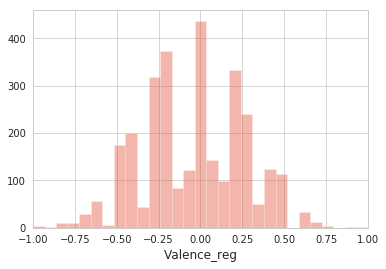

In [102]:
sns.set_style("whitegrid")
data_valence_2 = pd.read_csv('./data_preprocessed_cut_2_Valence.csv',encoding='utf-16')
g_2 = sns.distplot(data_valence_2.Valence_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/processed_dist_v_cut.png')

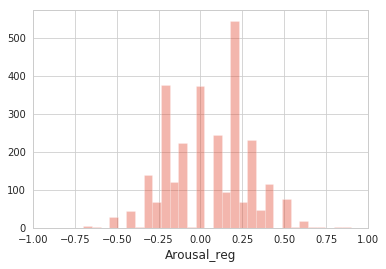

In [103]:
data_arousal_2 = pd.read_csv('./data_preprocessed_cut_2_Arousal.csv',encoding='utf-16')
g_3 = sns.distplot(data_arousal_2.Arousal_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/processed_dist_a_cut.png')

In [9]:
data_preprocessed = pd.read_csv('data_preprocessed_2.csv',encoding='utf-16')
# '"をblankでreplaceしたものがdata_preprocessed_2.csv

In [10]:
a = 1
b = 5
data_preprocessed = data_preprocessed.assign(
    Valence_reg = data_preprocessed.apply(lambda x: 2*(x['Valence']-a)/(b-a)-1, axis=1),
    Arousal_reg = data_preprocessed.apply(lambda x: 2*(x['Arousal']-a)/(b-a)-1, axis=1),
    Dominance_reg = data_preprocessed.apply(lambda x: 2*(x['Dominance']-a)/(b-a)-1, axis=1)
)

In [11]:
data_preprocessed.Valence_reg.min(),data_preprocessed.Valence_reg.max()

(-1.0, 1.0)

In [12]:
# 15words 以上を削る
data_preprocessed_cut = data_preprocessed[data_preprocessed['words']<=15]
print(len(data_preprocessed),len(data_preprocessed_cut))

10142 5830


In [15]:
data_preprocessed_cut.to_csv('data_cut_only.csv',encoding='utf-16')

In [14]:
data_preprocessed_cut.head()

,Unnamed: 0,id,sentence,Arousal,Dominance,Valence,sd.Arousal,sd.Dominance,sd.Valence,freq,reg,words,Valence_reg,Arousal_reg,Dominance_reg
0,0,Acephalous-Cant-believe_4_47,I can't believe I wrote all that last year.,3.4,3.2,3.0,0.800000,0.400000,0.000000,5,i cant believe i wrote all that last year,9,0.0,0.2,0.1
3,3,Acephalous-Cant-believe_500_515,What do I mean?,3.0,3.0,3.0,0.000000,0.000000,0.000000,5,what do i mean?,5,0.0,0.0,0.0
8,8,Acephalous-Cant-believe_1162_1229,"If you do have something better to do, though,...",3.0,3.2,2.8,0.000000,0.748331,0.400000,5,if you do have something better to do though ...,14,-0.1,0.0,0.1
9,9,Acephalous-Cant-believe_1266_1336,Why is someone so young not having fun with fr...,3.0,2.8,2.6,0.000000,0.400000,0.489898,5,why is someone so young not having fun with fr...,14,-0.2,0.0,-0.1
10,10,Acephalous-Cant-believe_1337_1409,"Granted grading papers is important, but no fu...",2.6,3.2,2.8,0.489898,0.748331,0.748331,5,granted grading papers is important but no fu...,13,-0.1,-0.2,0.1
